In [1]:
import os

# Check the contents of the input directory
print("Contents of /kaggle/input:")
print(os.listdir('/kaggle/input'))

# Use the correct path including the dataset name folder
dataset_folder = '/kaggle/input/oct-of-retina/RETINA OCT'
print(f"Contents of {dataset_folder}:")
print(os.listdir(dataset_folder))

Contents of /kaggle/input:
['oct-of-retina']
Contents of /kaggle/input/oct-of-retina/RETINA OCT:
['valid', 'test', 'train']


# DATASET ANALYSIS

In [2]:
import os

def analyze_dataset(base_path):
    # Lists to store the splits we want to analyze
    splits = ['train', 'test', 'valid']
    
    for split in splits:
        split_path = os.path.join(base_path, split)
        
        # Check if the split directory exists
        if not os.path.exists(split_path):
            print(f"\nWarning: {split} directory not found!")
            continue
            
        # Get all classes (subdirectories) in this split
        classes = os.listdir(split_path)
        
        print(f"\n{split.upper()} SET:")
        print(f"Number of classes: {len(classes)}")
        print("Files per class:")
        
        # Count files in each class
        for class_name in classes:
            class_path = os.path.join(split_path, class_name)
            if os.path.isdir(class_path):  # Make sure it's a directory
                num_files = len(os.listdir(class_path))
                print(f"- {class_name}: {num_files} files")

# Path to the dataset
dataset_path = '/kaggle/input/oct-of-retina/RETINA OCT'

print("Dataset Analysis:")
print("=" * 50)
analyze_dataset(dataset_path)


Dataset Analysis:

TRAIN SET:
Number of classes: 4
Files per class:
- DRUSEN: 4147 files
- CNV: 4195 files
- NORMAL: 4194 files
- DME: 4179 files

TEST SET:
Number of classes: 4
Files per class:
- DRUSEN: 898 files
- CNV: 900 files
- NORMAL: 900 files
- DME: 898 files

VALID SET:
Number of classes: 4
Files per class:
- DRUSEN: 895 files
- CNV: 900 files
- NORMAL: 900 files
- DME: 899 files


In [3]:
# Define base path and subdirectories
dataset_path = "/kaggle/input/oct-of-retina/RETINA OCT"
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "valid")
test_dir = os.path.join(dataset_path, "test")

print("Checking if directories exist:")
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Validation directory exists: {os.path.exists(val_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")

# Print example paths to verify structure
print("\nDirectory paths:")
print(f"Training: {train_dir}")
print(f"Validation: {val_dir}")
print(f"Testing: {test_dir}")


Checking if directories exist:
Train directory exists: True
Validation directory exists: True
Test directory exists: True

Directory paths:
Training: /kaggle/input/oct-of-retina/RETINA OCT/train
Validation: /kaggle/input/oct-of-retina/RETINA OCT/valid
Testing: /kaggle/input/oct-of-retina/RETINA OCT/test


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import os
import numpy as np

# Visualizing Raw images


Visualizing samples from: /kaggle/input/oct-of-retina/RETINA OCT/train
Classes: ['DRUSEN', 'CNV', 'NORMAL', 'DME']


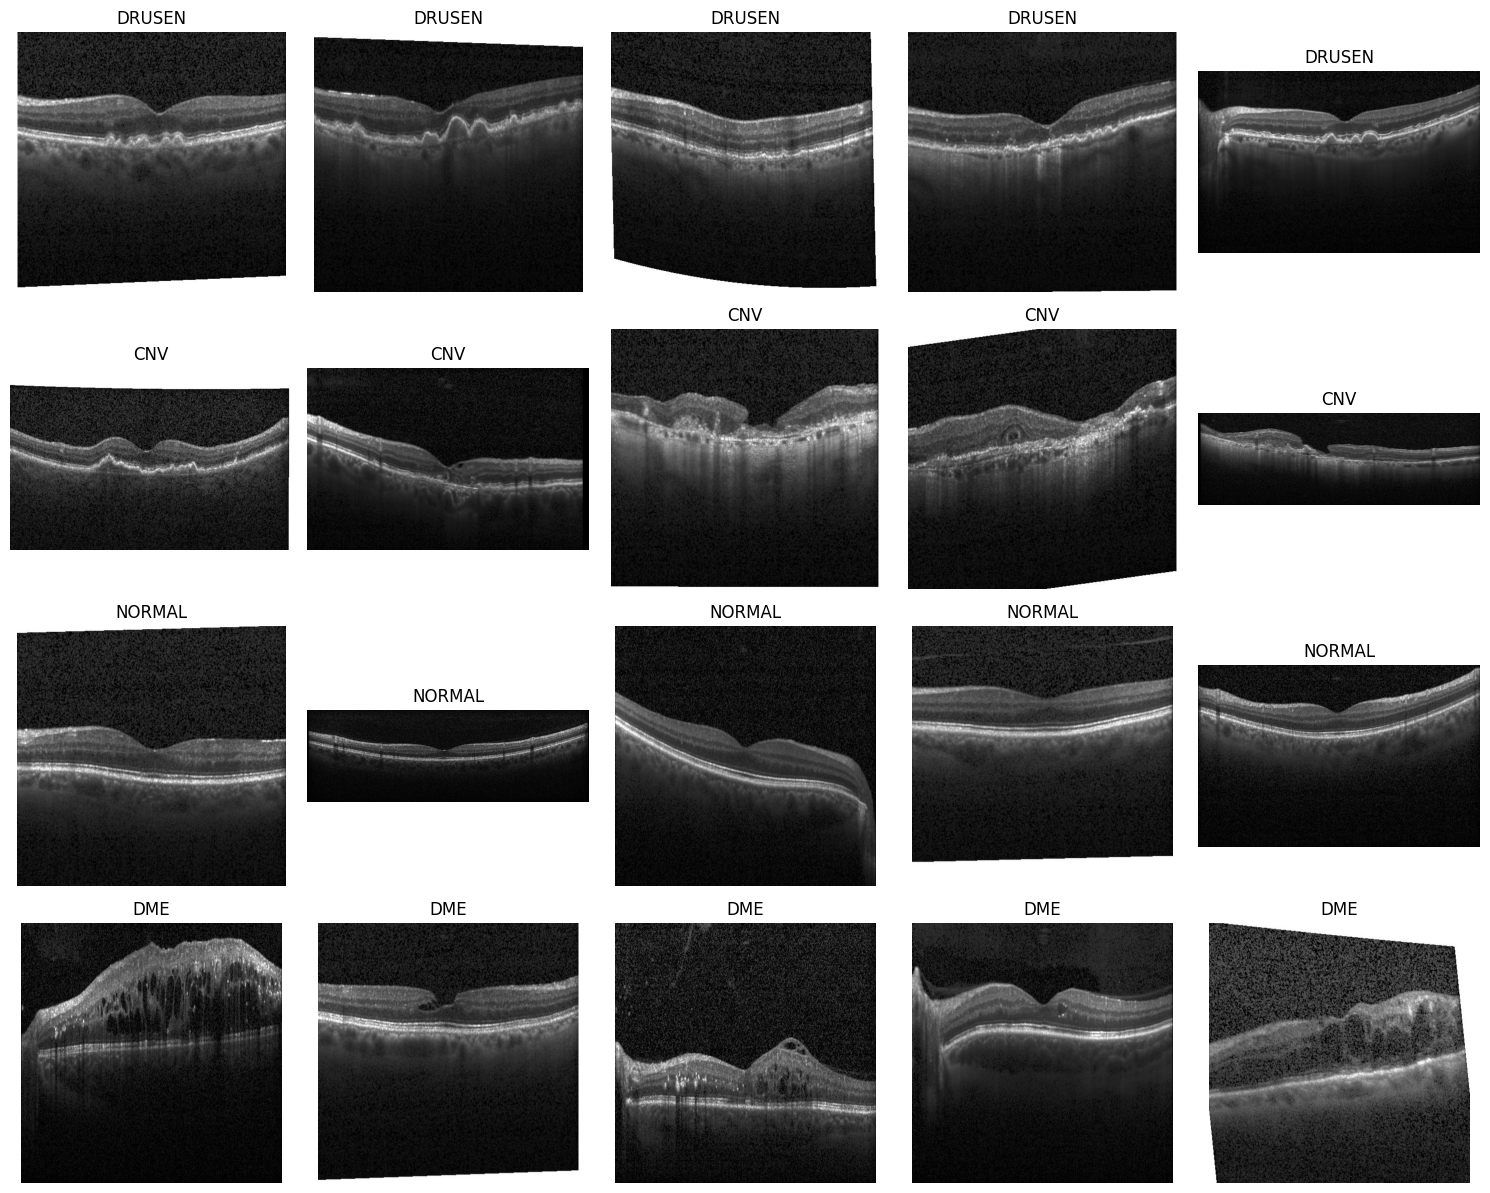

In [5]:
import os
import matplotlib.pyplot as plt
import cv2
import random

# Function to visualize sample images from each class
def visualize_samples(data_dir, num_samples=5):
    
    classes = os.listdir(data_dir)
    classes = [cls for cls in classes if os.path.isdir(os.path.join(data_dir, cls))]  # Filter valid directories

    print(f"\nVisualizing samples from: {data_dir}")
    print(f"Classes: {classes}")
    
    plt.figure(figsize=(15, len(classes) * 3))
    
    for idx, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        image_files = os.listdir(class_dir)
        image_files = [f for f in image_files if f.lower().endswith(('png', 'jpg', 'jpeg'))]
        
        # Randomly select images
        selected_images = random.sample(image_files, min(len(image_files), num_samples))
        
        for j, img_file in enumerate(selected_images):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)  # Read as RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            
            # Plot image
            plt.subplot(len(classes), num_samples, idx * num_samples + j + 1)
            plt.imshow(img)
            plt.title(f"{class_name}")
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
train_dir = "/kaggle/input/oct-of-retina/RETINA OCT/train"  # Change this to the actual path
visualize_samples(train_dir)

# Preprocessing and Augmentation¶

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/oct-of-retina/RETINA OCT/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

val_generator = val_test_datagen.flow_from_directory(
    '/kaggle/input/oct-of-retina/RETINA OCT/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

test_generator = val_test_datagen.flow_from_directory(
    '/kaggle/input/oct-of-retina/RETINA OCT/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

Found 16715 images belonging to 4 classes.
Found 3594 images belonging to 4 classes.
Found 3596 images belonging to 4 classes.


# Visualize the preprocessed image

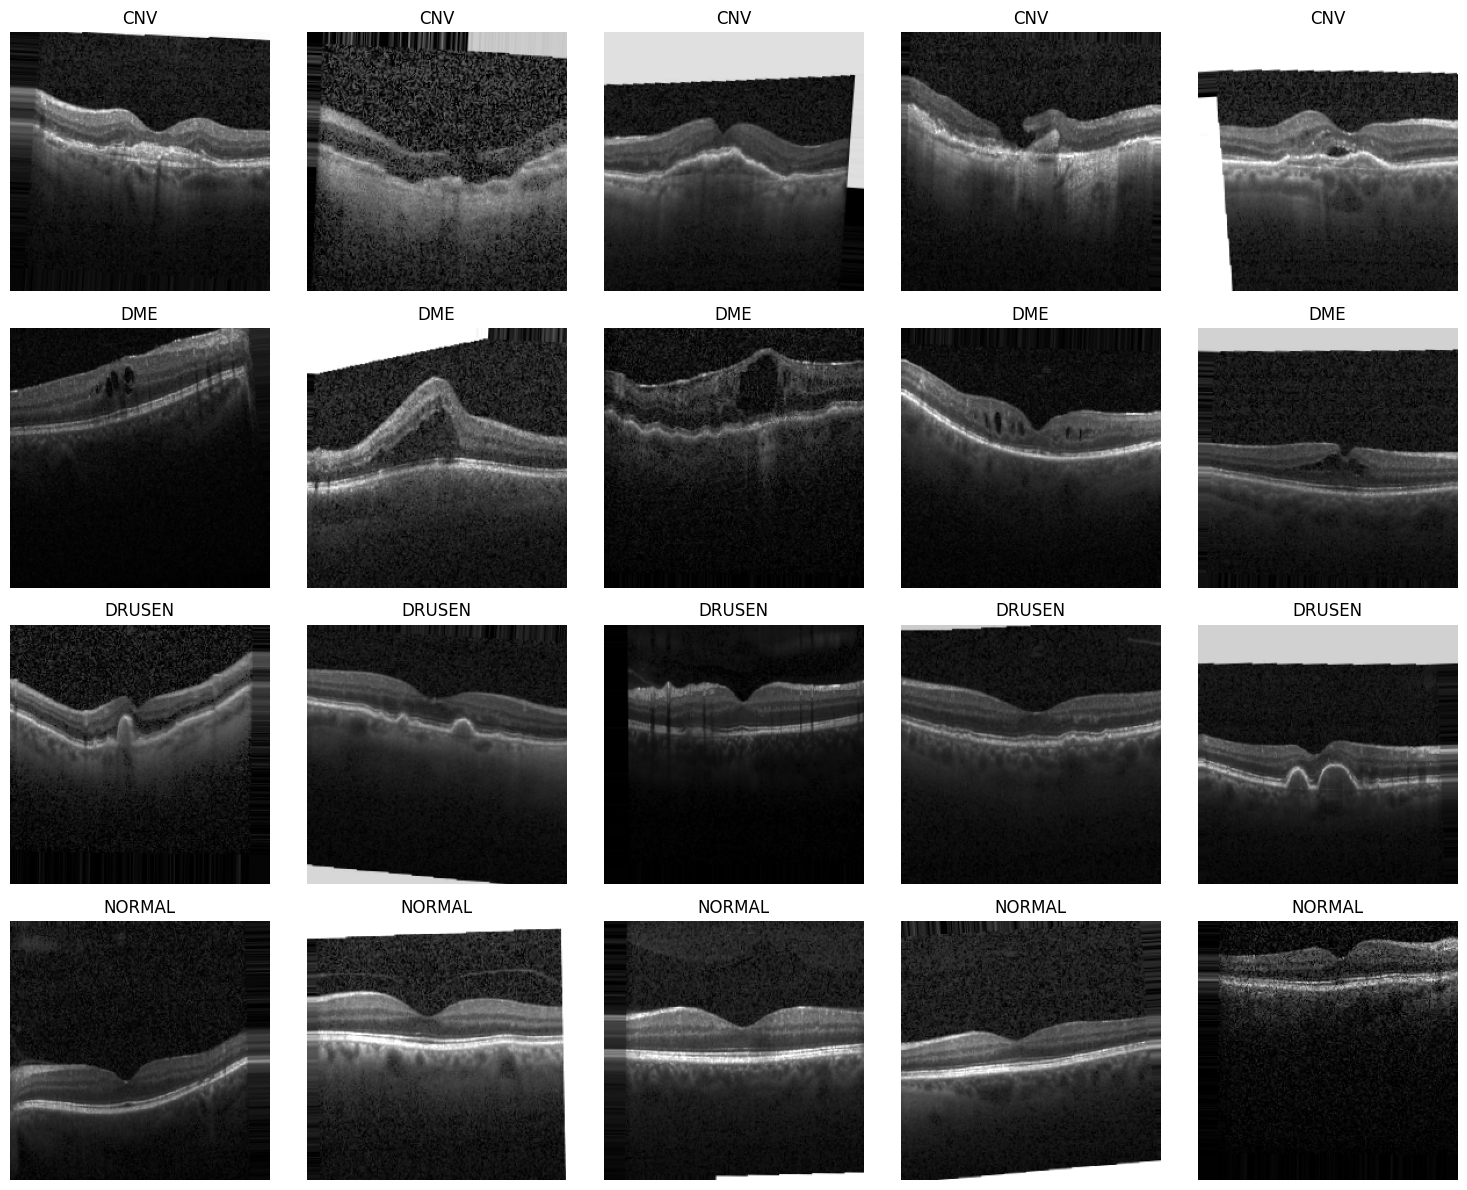

In [8]:
def visualize_augmented_samples(generator, num_samples=5):
    # Get class names and indices from the generator
    class_indices = generator.class_indices
    class_names = sorted(class_indices.keys(), key=lambda x: class_indices[x])
    num_classes = len(class_names)
    
    # Initialize storage for samples
    samples = {i: [] for i in range(num_classes)}
    max_batches = 10  # Safety limit to prevent infinite loops
    
    # Collect samples from generator batches
    for _ in range(max_batches):
        images, labels = next(generator)
        for img, label in zip(images, labels):
            class_idx = label.argmax()
            if len(samples[class_idx]) < num_samples:
                samples[class_idx].append(img)
        
        # Check if we've collected enough samples for all classes
        if all(len(v) >= num_samples for v in samples.values()):
            break
    
    # Create plot
    plt.figure(figsize=(15, num_classes * 3))
    
    for idx, class_name in enumerate(class_names):
        class_imgs = samples[idx][:num_samples]  # Get up to num_samples
        
        for j, img in enumerate(class_imgs):
            # Calculate position in grid
            position = idx * num_samples + j + 1
            plt.subplot(num_classes, num_samples, position)
            
            # Display image (assuming generator outputs [0,1] float values)
            plt.imshow(img)
            plt.title(f"{class_name}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
visualize_augmented_samples(train_generator)

# Custom CNN model

In [10]:
from tensorflow.keras.layers import Input,Conv2D, Lambda,MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import tensorflow as tf

def create_model_custom(input_shape=(224, 224, 3), num_classes=4, dropout_rate=0.3, l2_lambda=1e-5, learning_rate=0.001):
    inputs = Input(shape=input_shape)
    # (Optionally, if you want to normalize further, you can add a Lambda layer here; otherwise, the generator already rescales to [0,1])
    x = inputs
    # Initial convolution block
    x = Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    # Deep feature extraction blocks
    conv_blocks = [64, 128, 256, 512]
    for filters in conv_blocks:
        x = Conv2D(filters, (3, 3), padding='same', kernel_regularizer=l2(l2_lambda))(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, (3, 3), padding='same', kernel_regularizer=l2(l2_lambda))(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Dropout(dropout_rate / 2)(x)
    # Global pooling and classification head
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Dropout(dropout_rate)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer=SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

In [11]:
# Instantiate the model
model1 = create_model_custom(input_shape=(224, 224, 3), num_classes=4)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
]

model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 56, 56, 128)         │              

 Total params: 4,844,164 (18.48 MB)

 Trainable params: 4,839,748 (18.46 MB)

 Non-trainable params: 4,416 (17.25 KB)

# Model Training

In [12]:
history = model1.fit(
    train_generator,  
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)

model1.save('RETINAxCustom_CNN.keras')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


523/523 ━━━━━━━━━━━━━━━━━━━━ 406s 722ms/step - accuracy: 0.4572 - auc: 0.7153 - loss: 1.2787 - val_accuracy: 0.6032 - val_auc: 0.8006 - val_loss: 1.5681 - learning_rate: 0.0010
Epoch 2/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 291s 549ms/step - accuracy: 0.7464 - auc: 0.9257 - loss: 0.6773 - val_accuracy: 0.4338 - val_auc: 0.7216 - val_loss: 2.5018 - learning_rate: 0.0010
Epoch 3/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 284s 536ms/step - accuracy: 0.8112 - auc: 0.9545 - loss: 0.5274 - val_accuracy: 0.5879 - val_auc: 0.8474 - val_loss: 1.5280 - learning_rate: 0.0010
Epoch 4/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 288s 545ms/step - accuracy: 0.8416 - auc: 0.9671 - loss: 0.4453 - val_accuracy: 0.8050 - val_auc: 0.9524 - val_loss: 0.5410 - learning_rate: 0.0010
Epoch 5/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 279s 527ms/step - accuracy: 0.8680 - auc: 0.9755 - loss: 0.3837 - val_accuracy: 0.6903 - val_auc: 0.8945 - val_loss: 0.8964 - learning_rate: 0.0010
Epoch 6/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 279s 527ms/step - accuracy: 0.8

# Model Testing

In [13]:
from sklearn.metrics import classification_report
# After fixing the test generator to use shuffle=False
# Evaluate the model
test_loss, test_accuracy, test_auc = model1.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}, Test AUC: {test_auc:.4f}")
# Reset generator to ensure proper order
test_generator.reset()
y_pred = model1.predict(test_generator).argmax(axis=1)  # Changed best_model → model
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

  1/113 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.8125 - auc: 0.9740 - loss: 0.4783

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 49s 437ms/step - accuracy: 0.9116 - auc: 0.9871 - loss: 0.2795
Test Accuracy: 0.9266, Test AUC: 0.9896
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step
              precision    recall  f1-score   support

         CNV       0.93      0.90      0.92       900
         DME       0.96      0.92      0.94       898
      DRUSEN       0.93      0.90      0.91       898
      NORMAL       0.89      0.98      0.94       900

    accuracy                           0.93      3596
   macro avg       0.93      0.93      0.93      3596
weighted avg       0.93      0.93      0.93      3596



# Model Evaluation

Macro Precision: 0.9278
Macro Recall: 0.9266
Macro F1-Score: 0.9264



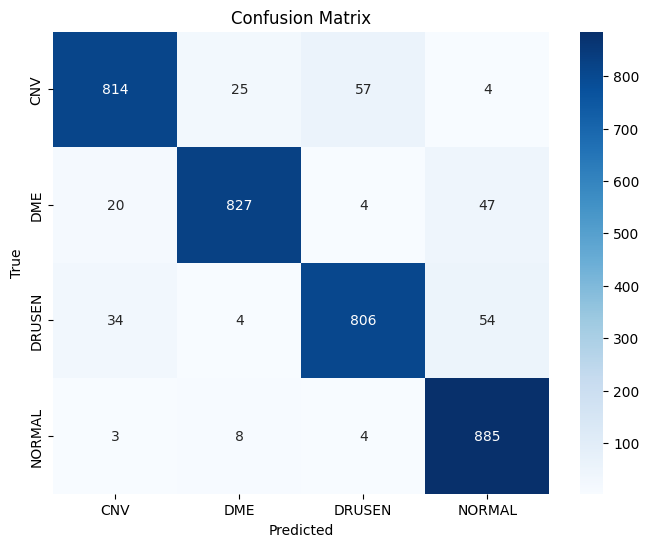

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
precision = precision_score(y_true, y_pred, average='macro')  # 'macro' for class-average
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}\n")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Get filenames and class mappings
filenames = test_generator.filenames
class_names = list(test_generator.class_indices.keys())
idx_to_class = {v: k for k, v in test_generator.class_indices.items()}

# Display first 10 samples
print("\nTesting 10 samples:")
for i in range(10):
    actual = idx_to_class[y_true[i]]
    predicted = idx_to_class[y_pred[i]]
    print(f"Sample {i+1}:")
    print(f"  File: {filenames[i]}")
    print(f"  Actual: {actual}")
    print(f"  Predicted: {predicted}")
    print("-" * 50)


Testing 10 samples:
Sample 1:
  File: CNV/CNV-1016042-181.jpeg
  Actual: CNV
  Predicted: CNV
--------------------------------------------------
Sample 2:
  File: CNV/CNV-1016042-200.jpeg
  Actual: CNV
  Predicted: CNV
--------------------------------------------------
Sample 3:
  File: CNV/CNV-1016042-73.jpeg
  Actual: CNV
  Predicted: CNV
--------------------------------------------------
Sample 4:
  File: CNV/CNV-103044-11.jpeg
  Actual: CNV
  Predicted: CNV
--------------------------------------------------
Sample 5:
  File: CNV/CNV-103044-45.jpeg
  Actual: CNV
  Predicted: CNV
--------------------------------------------------
Sample 6:
  File: CNV/CNV-103044-9.jpeg
  Actual: CNV
  Predicted: CNV
--------------------------------------------------
Sample 7:
  File: CNV/CNV-1083927-104.jpeg
  Actual: CNV
  Predicted: CNV
--------------------------------------------------
Sample 8:
  File: CNV/CNV-1083927-117.jpeg
  Actual: CNV
  Predicted: DME
--------------------------------------

# Grad-CAM

# ->CNV

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


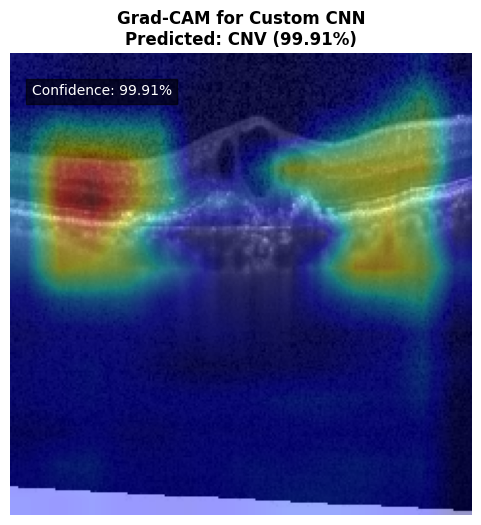

In [16]:
def compute_gradcam(model, img_array, target_class_idx, last_conv_layer_name="conv2d_8"):
    # Create a model that outputs the activations of the last conv layer and the predictions.
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, target_class_idx]
    
    # Compute gradients of the loss with respect to the convolutional outputs.
    grads = tape.gradient(loss, conv_outputs)
    
    # Compute the channel-wise mean of the gradients.
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Compute the weighted combination of feature maps.
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    
    # Apply ReLU to keep only positive influences.
    cam = tf.nn.relu(cam)
    
    # Normalize the heatmap.
    cam = cam - tf.reduce_min(cam)
    cam = cam / (tf.reduce_max(cam) + 1e-8)
    cam = cam[0].numpy()  # Remove the batch dimension.
    
    # Resize the heatmap to the input image dimensions.
    cam = tf.image.resize(cam[..., tf.newaxis], (img_array.shape[1], img_array.shape[2]))
    cam = tf.squeeze(cam).numpy()
    return cam

# --- Enhanced example usage with confidence score ---
img_path = '/kaggle/input/oct-of-retina/RETINA OCT/train/CNV/CNV-1016042-121.jpeg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0  # Maintain consistent preprocessing
img_array = np.expand_dims(img_array, axis=0)

class_labels = {0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}

# Generate prediction and confidence score
preds = model1.predict(img_array)
predicted_class = np.argmax(preds[0])
predicted_label = class_labels[predicted_class]
confidence = np.max(preds[0]) * 100  # Calculate confidence percentage

# Compute Grad-CAM heatmap
heatmap = compute_gradcam(
    model1, 
    img_array, 
    target_class_idx=predicted_class,
    last_conv_layer_name="conv2d_8"  # Custom CNN's target layer
)

# Create visualization with confidence elements
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Custom CNN\nPredicted: {predicted_label} ({confidence:.2f}%)", 
         fontsize=12, fontweight='bold')
plt.axis('off')

# Add confidence annotation
plt.text(10, 20, f"Confidence: {confidence:.2f}%", 
        fontsize=10, color='white', 
        bbox=dict(facecolor='black', alpha=0.6))

plt.show()

Adjusted Bounding Box: (10, 0, 132, 224)


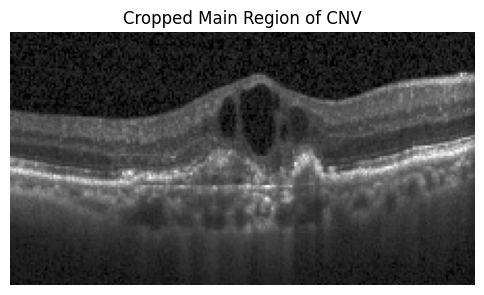

In [17]:
def extract_main_region_from_heatmap(heatmap, threshold=0.5, padding_ratio=0.2):
    
    # Create binary mask
    mask = heatmap >= threshold
    
   
    if not np.any(mask):
        threshold = 0.3 * np.max(heatmap)  
        mask = heatmap >= threshold
    
    if not np.any(mask):
        return None
    
    # Find initial coordinates
    coords = np.argwhere(mask)
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0) + 1
    
    # Calculate proportional padding
    height = y_max - y_min
    width = x_max - x_min
    
    # Add padding (20% of region size by default)
    y_pad = int(height * padding_ratio)
    x_pad = int(width * padding_ratio)
    
    # Apply padding with image boundary checks
    y_min = max(0, y_min - y_pad)
    y_max = min(heatmap.shape[0], y_max + y_pad)
    x_min = max(0, x_min - x_pad)
    x_max = min(heatmap.shape[1], x_max + x_pad)
    
    return (y_min, x_min, y_max, x_max)

# Usage with adjusted parameters
bbox = extract_main_region_from_heatmap(
    heatmap, 
    threshold=0.5,
    padding_ratio=.25  # 20% padding around the region
)

if bbox is None:
    print("No activated region found.")
else:
    print("Adjusted Bounding Box:", bbox)
    
    # Crop with padding
    cropped_img = img.crop((bbox[1], bbox[0], bbox[3], bbox[2]))
    
    # Display
    plt.figure(figsize=(6, 6))
    plt.imshow(cropped_img)
    plt.title("Cropped Main Region of CNV")
    plt.axis("off")
    plt.show()

**Patch in the region**

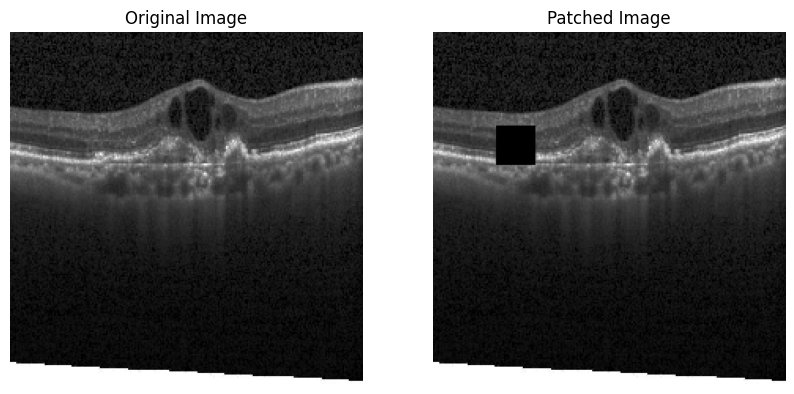

In [20]:
# Convert original image array back to uint8 for visualization
original_image = (img_array[0] * 255).astype(np.uint8)

# Make a copy of the original image to modify
patched_img = original_image.copy()

# Define patch properties
patch_size = 25  # Adjust as needed
x, y = 40, 60  # Change patch location
patch = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)  # Black patch

# Apply the patch
patched_img[y:y+patch_size, x:x+patch_size] = patch

# Preprocess patched image for model (normalize)
patched_img_array = patched_img / 255.0
patched_img_array = np.expand_dims(patched_img_array, axis=0)

# Display original and patched images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Patched Image
plt.subplot(1, 2, 2)
plt.imshow(patched_img)
plt.title("Patched Image")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


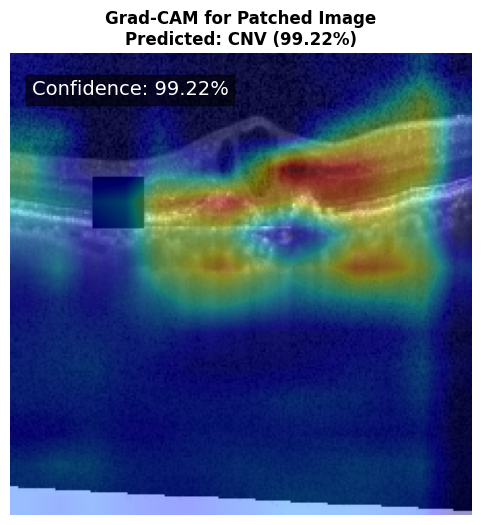

In [21]:
# Predict patched image
patched_preds = model1.predict(patched_img_array)
patched_predicted_class = np.argmax(patched_preds[0])
patched_predicted_label = class_labels[patched_predicted_class]
patched_confidence = np.max(patched_preds[0]) * 100

# Compute Grad-CAM for patched image
patched_heatmap = compute_gradcam(model1, patched_img_array, target_class_idx=patched_predicted_class, last_conv_layer_name="conv2d_8")

# Display Grad-CAM
plt.figure(figsize=(6, 6))
plt.imshow(patched_img)
plt.imshow(patched_heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Patched Image\nPredicted: {patched_predicted_label} ({patched_confidence:.2f}%)", fontsize=12, fontweight='bold', color='black')
plt.axis("off")

# Show confidence score inside the image
plt.text(10, 20, f"Confidence: {patched_confidence:.2f}%", fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.6))

plt.show()

**Patch out of the region**

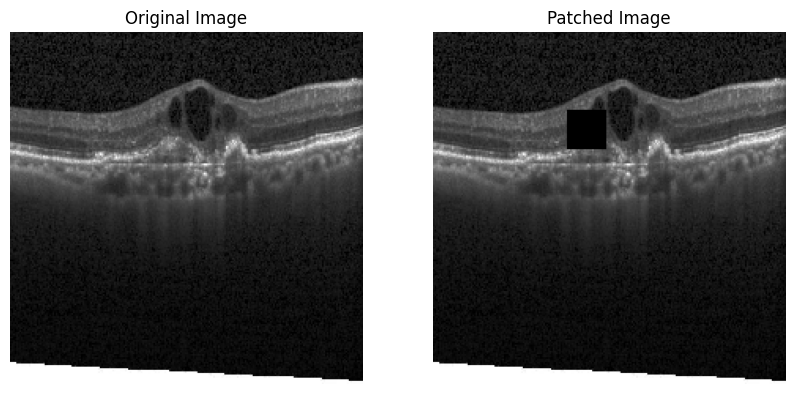

In [24]:
# Convert original image array back to uint8 for visualization
original_image = (img_array[0] * 255).astype(np.uint8)

# Make a copy of the original image to modify
patched_img = original_image.copy()

# Define patch properties
patch_size = 25  # Adjust as needed
x, y = 85, 50  # Change patch location
patch = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)  # Black patch

# Apply the patch
patched_img[y:y+patch_size, x:x+patch_size] = patch

# Preprocess patched image for model (normalize)
patched_img_array = patched_img / 255.0
patched_img_array = np.expand_dims(patched_img_array, axis=0)

# Display original and patched images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Patched Image
plt.subplot(1, 2, 2)
plt.imshow(patched_img)
plt.title("Patched Image")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


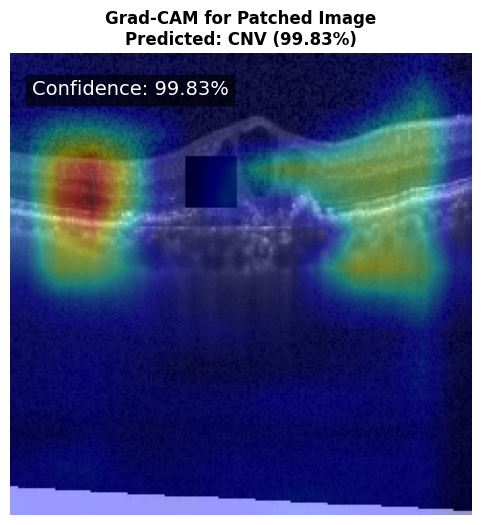

In [25]:
# Predict patched image
patched_preds = model1.predict(patched_img_array)
patched_predicted_class = np.argmax(patched_preds[0])
patched_predicted_label = class_labels[patched_predicted_class]
patched_confidence = np.max(patched_preds[0]) * 100

# Compute Grad-CAM for patched image
patched_heatmap = compute_gradcam(model1, patched_img_array, target_class_idx=patched_predicted_class, last_conv_layer_name="conv2d_8")

# Display Grad-CAM
plt.figure(figsize=(6, 6))
plt.imshow(patched_img)
plt.imshow(patched_heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Patched Image\nPredicted: {patched_predicted_label} ({patched_confidence:.2f}%)", fontsize=12, fontweight='bold', color='black')
plt.axis("off")

# Show confidence score inside the image
plt.text(10, 20, f"Confidence: {patched_confidence:.2f}%", fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.6))

plt.show()

# ->DME

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


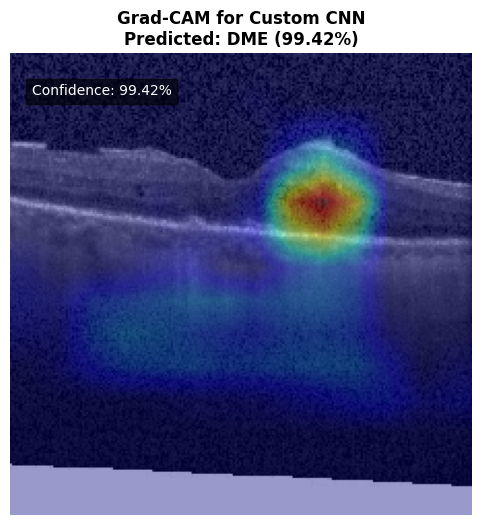

In [26]:
def compute_gradcam(model, img_array, target_class_idx, last_conv_layer_name="conv2d_8"):
    # Create a model that outputs the activations of the last conv layer and the predictions.
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, target_class_idx]
    
    # Compute gradients of the loss with respect to the convolutional outputs.
    grads = tape.gradient(loss, conv_outputs)
    
    # Compute the channel-wise mean of the gradients.
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Compute the weighted combination of feature maps.
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    
    # Apply ReLU to keep only positive influences.
    cam = tf.nn.relu(cam)
    
    # Normalize the heatmap.
    cam = cam - tf.reduce_min(cam)
    cam = cam / (tf.reduce_max(cam) + 1e-8)
    cam = cam[0].numpy()  # Remove the batch dimension.
    
    # Resize the heatmap to the input image dimensions.
    cam = tf.image.resize(cam[..., tf.newaxis], (img_array.shape[1], img_array.shape[2]))
    cam = tf.squeeze(cam).numpy()
    return cam

# --- Enhanced example usage with confidence score ---
img_path = '/kaggle/input/oct-of-retina/RETINA OCT/valid/DME/DME-1083927-8.jpeg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0  # Maintain consistent preprocessing
img_array = np.expand_dims(img_array, axis=0)

class_labels = {0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}

# Generate prediction and confidence score
preds = model1.predict(img_array)
predicted_class = np.argmax(preds[0])
predicted_label = class_labels[predicted_class]
confidence = np.max(preds[0]) * 100  # Calculate confidence percentage

# Compute Grad-CAM heatmap
heatmap = compute_gradcam(
    model1, 
    img_array, 
    target_class_idx=predicted_class,
    last_conv_layer_name="conv2d_8"  # Custom CNN's target layer
)

# Create visualization with confidence elements
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Custom CNN\nPredicted: {predicted_label} ({confidence:.2f}%)", 
         fontsize=12, fontweight='bold')
plt.axis('off')

# Add confidence annotation
plt.text(10, 20, f"Confidence: {confidence:.2f}%", 
        fontsize=10, color='white', 
        bbox=dict(facecolor='black', alpha=0.6))

plt.show()

Adjusted Bounding Box: (43, 114, 108, 188)


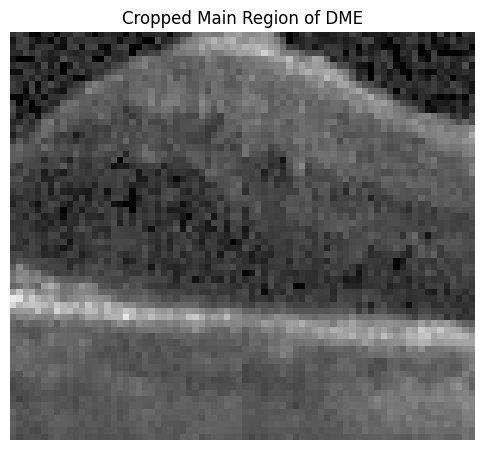

In [29]:
def extract_main_region_from_heatmap(heatmap, threshold=0.5, padding_ratio=0.2):
    
    # Create binary mask
    mask = heatmap >= threshold
    
   
    if not np.any(mask):
        threshold = 0.3 * np.max(heatmap)  
        mask = heatmap >= threshold
    
    if not np.any(mask):
        return None
    
    # Find initial coordinates
    coords = np.argwhere(mask)
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0) + 1
    
    # Calculate proportional padding
    height = y_max - y_min
    width = x_max - x_min
    
    # Add padding (20% of region size by default)
    y_pad = int(height * padding_ratio)
    x_pad = int(width * padding_ratio)
    
    # Apply padding with image boundary checks
    y_min = max(0, y_min - y_pad)
    y_max = min(heatmap.shape[0], y_max + y_pad)
    x_min = max(0, x_min - x_pad)
    x_max = min(heatmap.shape[1], x_max + x_pad)
    
    return (y_min, x_min, y_max, x_max)

# Usage with adjusted parameters
bbox = extract_main_region_from_heatmap(
    heatmap, 
    threshold=0.5,
    padding_ratio=.40  # 20% padding around the region
)

if bbox is None:
    print("No activated region found.")
else:
    print("Adjusted Bounding Box:", bbox)
    
    # Crop with padding
    cropped_img = img.crop((bbox[1], bbox[0], bbox[3], bbox[2]))
    
    # Display
    plt.figure(figsize=(6, 6))
    plt.imshow(cropped_img)
    plt.title("Cropped Main Region of DME")
    plt.axis("off")
    plt.show()

**Patch in the region**

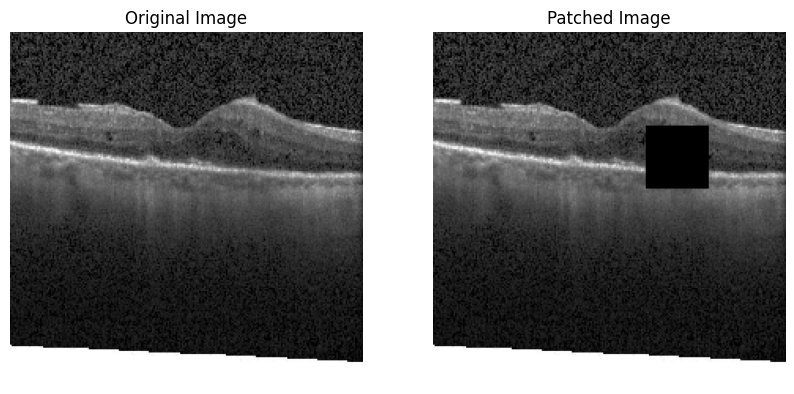

In [35]:
# Convert original image array back to uint8 for visualization
original_image = (img_array[0] * 255).astype(np.uint8)

# Make a copy of the original image to modify
patched_img = original_image.copy()

# Define patch properties
patch_size = 40  # Adjust as needed
x, y = 135, 60  # Change patch location
patch = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)  # Black patch

# Apply the patch
patched_img[y:y+patch_size, x:x+patch_size] = patch

# Preprocess patched image for model (normalize)
patched_img_array = patched_img / 255.0
patched_img_array = np.expand_dims(patched_img_array, axis=0)

# Display original and patched images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Patched Image
plt.subplot(1, 2, 2)
plt.imshow(patched_img)
plt.title("Patched Image")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


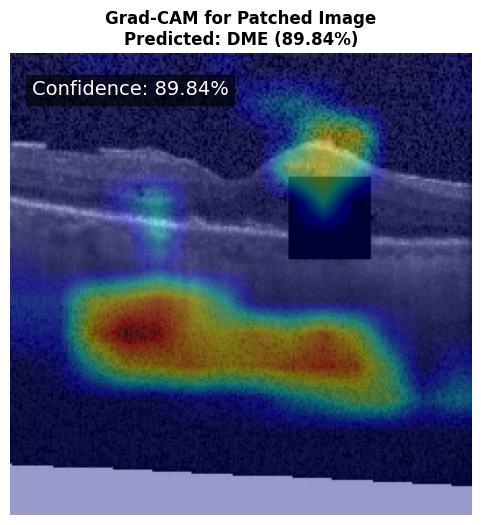

In [36]:
# Predict patched image
patched_preds = model1.predict(patched_img_array)
patched_predicted_class = np.argmax(patched_preds[0])
patched_predicted_label = class_labels[patched_predicted_class]
patched_confidence = np.max(patched_preds[0]) * 100

# Compute Grad-CAM for patched image
patched_heatmap = compute_gradcam(model1, patched_img_array, target_class_idx=patched_predicted_class, last_conv_layer_name="conv2d_8")

# Display Grad-CAM
plt.figure(figsize=(6, 6))
plt.imshow(patched_img)
plt.imshow(patched_heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Patched Image\nPredicted: {patched_predicted_label} ({patched_confidence:.2f}%)", fontsize=12, fontweight='bold', color='black')
plt.axis("off")

# Show confidence score inside the image
plt.text(10, 20, f"Confidence: {patched_confidence:.2f}%", fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.6))

plt.show()

**Patch out of the region**

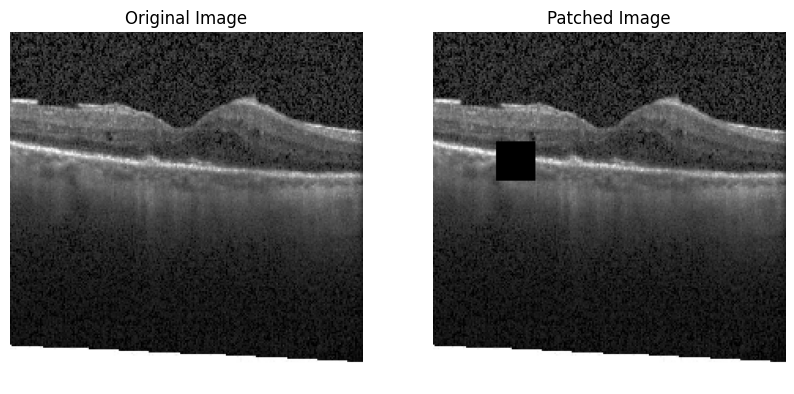

In [37]:
# Convert original image array back to uint8 for visualization
original_image = (img_array[0] * 255).astype(np.uint8)

# Make a copy of the original image to modify
patched_img = original_image.copy()

# Define patch properties
patch_size = 25  # Adjust as needed
x, y = 40, 70  # Change patch location
patch = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)  # Black patch

# Apply the patch
patched_img[y:y+patch_size, x:x+patch_size] = patch

# Preprocess patched image for model (normalize)
patched_img_array = patched_img / 255.0
patched_img_array = np.expand_dims(patched_img_array, axis=0)

# Display original and patched images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Patched Image
plt.subplot(1, 2, 2)
plt.imshow(patched_img)
plt.title("Patched Image")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


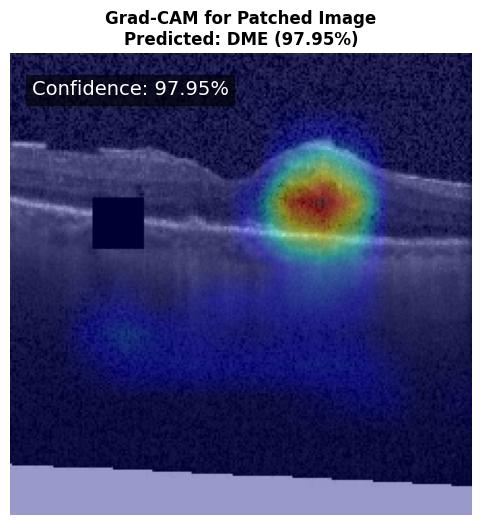

In [38]:
# Predict patched image
patched_preds = model1.predict(patched_img_array)
patched_predicted_class = np.argmax(patched_preds[0])
patched_predicted_label = class_labels[patched_predicted_class]
patched_confidence = np.max(patched_preds[0]) * 100

# Compute Grad-CAM for patched image
patched_heatmap = compute_gradcam(model1, patched_img_array, target_class_idx=patched_predicted_class, last_conv_layer_name="conv2d_8")

# Display Grad-CAM
plt.figure(figsize=(6, 6))
plt.imshow(patched_img)
plt.imshow(patched_heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Patched Image\nPredicted: {patched_predicted_label} ({patched_confidence:.2f}%)", fontsize=12, fontweight='bold', color='black')
plt.axis("off")

# Show confidence score inside the image
plt.text(10, 20, f"Confidence: {patched_confidence:.2f}%", fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.6))

plt.show()

# ->DRUSEN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


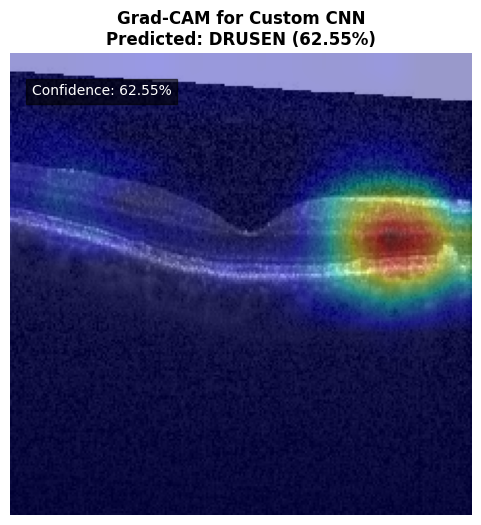

In [39]:
def compute_gradcam(model, img_array, target_class_idx, last_conv_layer_name="conv2d_8"):
    # Create a model that outputs the activations of the last conv layer and the predictions.
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, target_class_idx]
    
    # Compute gradients of the loss with respect to the convolutional outputs.
    grads = tape.gradient(loss, conv_outputs)
    
    # Compute the channel-wise mean of the gradients.
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Compute the weighted combination of feature maps.
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    
    # Apply ReLU to keep only positive influences.
    cam = tf.nn.relu(cam)
    
    # Normalize the heatmap.
    cam = cam - tf.reduce_min(cam)
    cam = cam / (tf.reduce_max(cam) + 1e-8)
    cam = cam[0].numpy()  # Remove the batch dimension.
    
    # Resize the heatmap to the input image dimensions.
    cam = tf.image.resize(cam[..., tf.newaxis], (img_array.shape[1], img_array.shape[2]))
    cam = tf.squeeze(cam).numpy()
    return cam

# --- Enhanced example usage with confidence score ---
img_path = '/kaggle/input/oct-of-retina/RETINA OCT/valid/DRUSEN/DRUSEN-1001666-2.jpeg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0  # Maintain consistent preprocessing
img_array = np.expand_dims(img_array, axis=0)

class_labels = {0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}

# Generate prediction and confidence score
preds = model1.predict(img_array)
predicted_class = np.argmax(preds[0])
predicted_label = class_labels[predicted_class]
confidence = np.max(preds[0]) * 100  # Calculate confidence percentage

# Compute Grad-CAM heatmap
heatmap = compute_gradcam(
    model1, 
    img_array, 
    target_class_idx=predicted_class,
    last_conv_layer_name="conv2d_8"  # Custom CNN's target layer
)

# Create visualization with confidence elements
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Custom CNN\nPredicted: {predicted_label} ({confidence:.2f}%)", 
         fontsize=12, fontweight='bold')
plt.axis('off')

# Add confidence annotation
plt.text(10, 20, f"Confidence: {confidence:.2f}%", 
        fontsize=10, color='white', 
        bbox=dict(facecolor='black', alpha=0.6))

plt.show()

Adjusted Bounding Box: (54, 144, 128, 224)


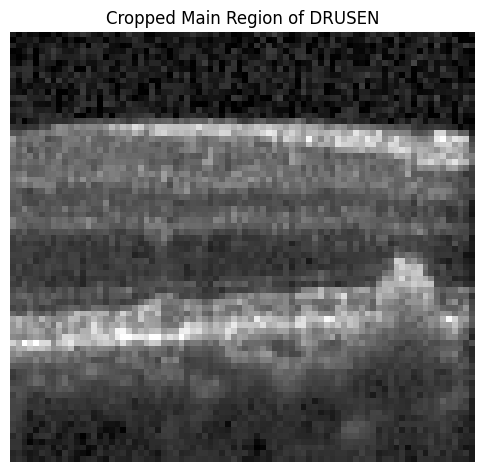

In [40]:
def extract_main_region_from_heatmap(heatmap, threshold=0.5, padding_ratio=0.2):
    
    # Create binary mask
    mask = heatmap >= threshold
    
   
    if not np.any(mask):
        threshold = 0.3 * np.max(heatmap)  
        mask = heatmap >= threshold
    
    if not np.any(mask):
        return None
    
    # Find initial coordinates
    coords = np.argwhere(mask)
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0) + 1
    
    # Calculate proportional padding
    height = y_max - y_min
    width = x_max - x_min
    
    # Add padding (20% of region size by default)
    y_pad = int(height * padding_ratio)
    x_pad = int(width * padding_ratio)
    
    # Apply padding with image boundary checks
    y_min = max(0, y_min - y_pad)
    y_max = min(heatmap.shape[0], y_max + y_pad)
    x_min = max(0, x_min - x_pad)
    x_max = min(heatmap.shape[1], x_max + x_pad)
    
    return (y_min, x_min, y_max, x_max)

# Usage with adjusted parameters
bbox = extract_main_region_from_heatmap(
    heatmap, 
    threshold=0.5,
    padding_ratio=.25  # 20% padding around the region
)

if bbox is None:
    print("No activated region found.")
else:
    print("Adjusted Bounding Box:", bbox)
    
    # Crop with padding
    cropped_img = img.crop((bbox[1], bbox[0], bbox[3], bbox[2]))
    
    # Display
    plt.figure(figsize=(6, 6))
    plt.imshow(cropped_img)
    plt.title("Cropped Main Region of DRUSEN")
    plt.axis("off")
    plt.show()

**Patch in the region**

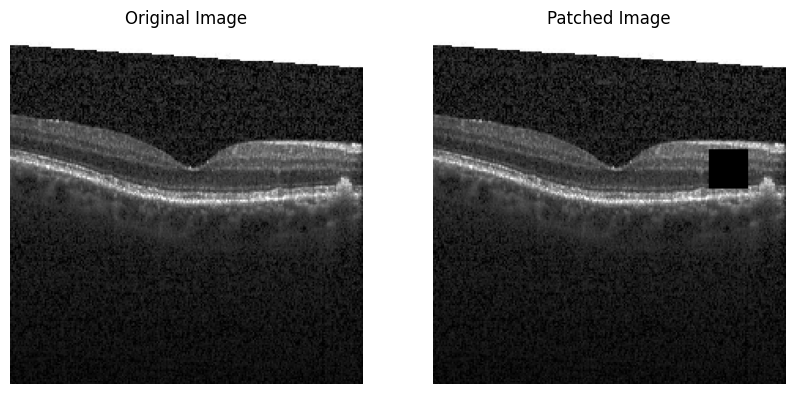

In [46]:
# Convert original image array back to uint8 for visualization
original_image = (img_array[0] * 255).astype(np.uint8)

# Make a copy of the original image to modify
patched_img = original_image.copy()

# Define patch properties
patch_size = 25  # Adjust as needed
x, y = 175, 75  # Change patch location
patch = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)  # Black patch

# Apply the patch
patched_img[y:y+patch_size, x:x+patch_size] = patch

# Preprocess patched image for model (normalize)
patched_img_array = patched_img / 255.0
patched_img_array = np.expand_dims(patched_img_array, axis=0)

# Display original and patched images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Patched Image
plt.subplot(1, 2, 2)
plt.imshow(patched_img)
plt.title("Patched Image")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


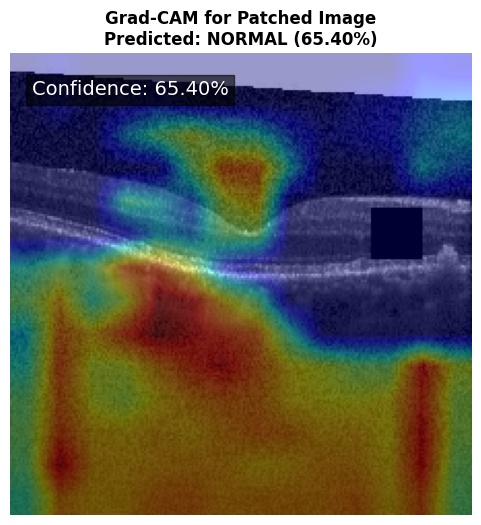

In [47]:
# Predict patched image
patched_preds = model1.predict(patched_img_array)
patched_predicted_class = np.argmax(patched_preds[0])
patched_predicted_label = class_labels[patched_predicted_class]
patched_confidence = np.max(patched_preds[0]) * 100

# Compute Grad-CAM for patched image
patched_heatmap = compute_gradcam(model1, patched_img_array, target_class_idx=patched_predicted_class, last_conv_layer_name="conv2d_8")

# Display Grad-CAM
plt.figure(figsize=(6, 6))
plt.imshow(patched_img)
plt.imshow(patched_heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Patched Image\nPredicted: {patched_predicted_label} ({patched_confidence:.2f}%)", fontsize=12, fontweight='bold', color='black')
plt.axis("off")

# Show confidence score inside the image
plt.text(10, 20, f"Confidence: {patched_confidence:.2f}%", fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.6))

plt.show()

**Patch out of the region**

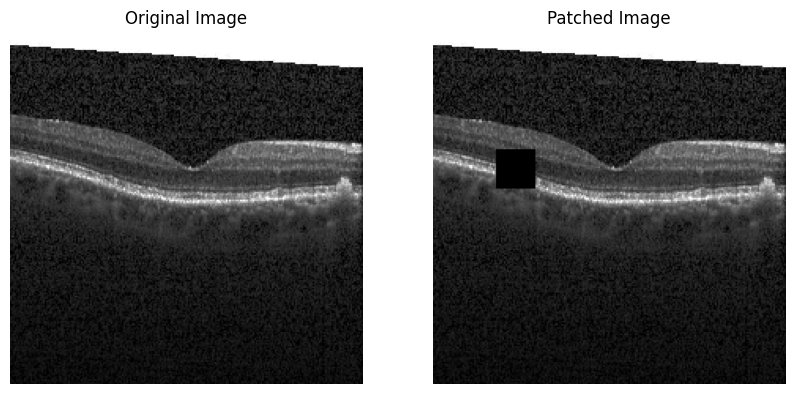

In [48]:
# Convert original image array back to uint8 for visualization
original_image = (img_array[0] * 255).astype(np.uint8)

# Make a copy of the original image to modify
patched_img = original_image.copy()

# Define patch properties
patch_size = 25  # Adjust as needed
x, y = 40, 75  # Change patch location
patch = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)  # Black patch

# Apply the patch
patched_img[y:y+patch_size, x:x+patch_size] = patch

# Preprocess patched image for model (normalize)
patched_img_array = patched_img / 255.0
patched_img_array = np.expand_dims(patched_img_array, axis=0)

# Display original and patched images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Patched Image
plt.subplot(1, 2, 2)
plt.imshow(patched_img)
plt.title("Patched Image")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


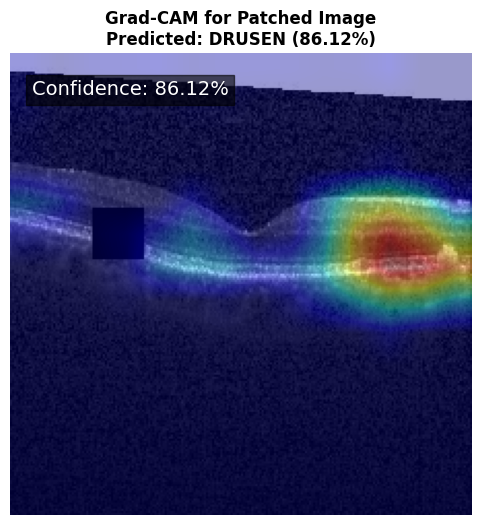

In [49]:
# Predict patched image
patched_preds = model1.predict(patched_img_array)
patched_predicted_class = np.argmax(patched_preds[0])
patched_predicted_label = class_labels[patched_predicted_class]
patched_confidence = np.max(patched_preds[0]) * 100

# Compute Grad-CAM for patched image
patched_heatmap = compute_gradcam(model1, patched_img_array, target_class_idx=patched_predicted_class, last_conv_layer_name="conv2d_8")

# Display Grad-CAM
plt.figure(figsize=(6, 6))
plt.imshow(patched_img)
plt.imshow(patched_heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Patched Image\nPredicted: {patched_predicted_label} ({patched_confidence:.2f}%)", fontsize=12, fontweight='bold', color='black')
plt.axis("off")

# Show confidence score inside the image
plt.text(10, 20, f"Confidence: {patched_confidence:.2f}%", fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.6))

plt.show()

# ->NORMAL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


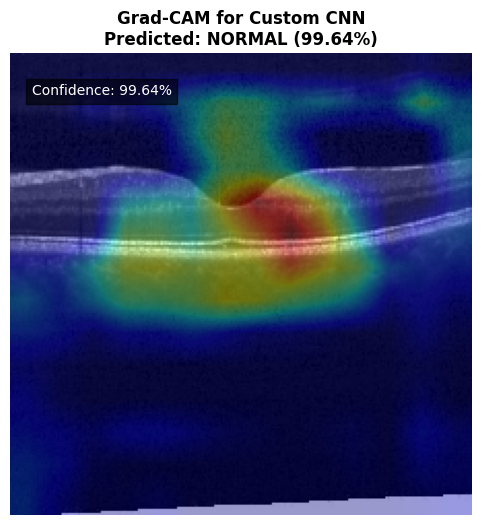

In [51]:
def compute_gradcam(model, img_array, target_class_idx, last_conv_layer_name="conv2d_8"):
    # Create a model that outputs the activations of the last conv layer and the predictions.
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, target_class_idx]
    
    # Compute gradients of the loss with respect to the convolutional outputs.
    grads = tape.gradient(loss, conv_outputs)
    
    # Compute the channel-wise mean of the gradients.
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Compute the weighted combination of feature maps.
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    
    # Apply ReLU to keep only positive influences.
    cam = tf.nn.relu(cam)
    
    # Normalize the heatmap.
    cam = cam - tf.reduce_min(cam)
    cam = cam / (tf.reduce_max(cam) + 1e-8)
    cam = cam[0].numpy()  # Remove the batch dimension.
    
    # Resize the heatmap to the input image dimensions.
    cam = tf.image.resize(cam[..., tf.newaxis], (img_array.shape[1], img_array.shape[2]))
    cam = tf.squeeze(cam).numpy()
    return cam

# --- Enhanced example usage with confidence score ---
img_path = '/kaggle/input/oct-of-retina/RETINA OCT/valid/NORMAL/NORMAL-1014715-10.jpeg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0  # Maintain consistent preprocessing
img_array = np.expand_dims(img_array, axis=0)

class_labels = {0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}

# Generate prediction and confidence score
preds = model1.predict(img_array)
predicted_class = np.argmax(preds[0])
predicted_label = class_labels[predicted_class]
confidence = np.max(preds[0]) * 100  # Calculate confidence percentage

# Compute Grad-CAM heatmap
heatmap = compute_gradcam(
    model1, 
    img_array, 
    target_class_idx=predicted_class,
    last_conv_layer_name="conv2d_8"  # Custom CNN's target layer
)

# Create visualization with confidence elements
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Custom CNN\nPredicted: {predicted_label} ({confidence:.2f}%)", 
         fontsize=12, fontweight='bold')
plt.axis('off')

# Add confidence annotation
plt.text(10, 20, f"Confidence: {confidence:.2f}%", 
        fontsize=10, color='white', 
        bbox=dict(facecolor='black', alpha=0.6))

plt.show()

Adjusted Bounding Box: (19, 32, 137, 188)


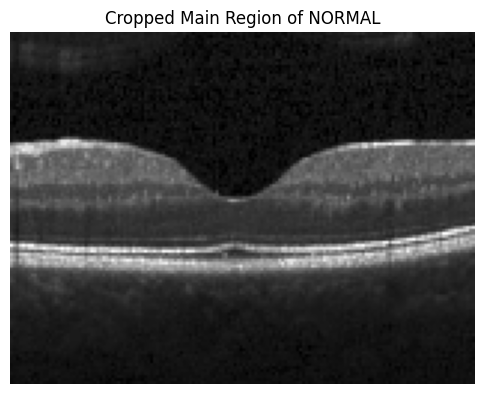

In [53]:
def extract_main_region_from_heatmap(heatmap, threshold=0.5, padding_ratio=0.2):
    
    # Create binary mask
    mask = heatmap >= threshold
    
   
    if not np.any(mask):
        threshold = 0.3 * np.max(heatmap)  
        mask = heatmap >= threshold
    
    if not np.any(mask):
        return None
    
    # Find initial coordinates
    coords = np.argwhere(mask)
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0) + 1
    
    # Calculate proportional padding
    height = y_max - y_min
    width = x_max - x_min
    
    # Add padding (20% of region size by default)
    y_pad = int(height * padding_ratio)
    x_pad = int(width * padding_ratio)
    
    # Apply padding with image boundary checks
    y_min = max(0, y_min - y_pad)
    y_max = min(heatmap.shape[0], y_max + y_pad)
    x_min = max(0, x_min - x_pad)
    x_max = min(heatmap.shape[1], x_max + x_pad)
    
    return (y_min, x_min, y_max, x_max)

# Usage with adjusted parameters
bbox = extract_main_region_from_heatmap(
    heatmap, 
    threshold=0.5,
    padding_ratio=.15  # 20% padding around the region
)

if bbox is None:
    print("No activated region found.")
else:
    print("Adjusted Bounding Box:", bbox)
    
    # Crop with padding
    cropped_img = img.crop((bbox[1], bbox[0], bbox[3], bbox[2]))
    
    # Display
    plt.figure(figsize=(6, 6))
    plt.imshow(cropped_img)
    plt.title("Cropped Main Region of NORMAL")
    plt.axis("off")
    plt.show()

**Patch in the region**

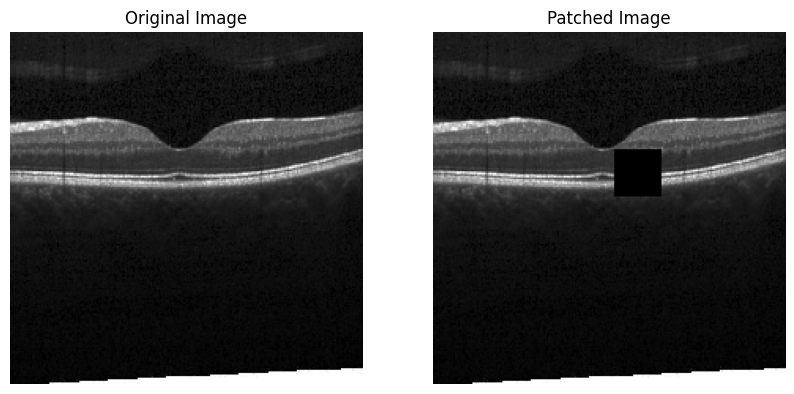

In [57]:
# Convert original image array back to uint8 for visualization
original_image = (img_array[0] * 255).astype(np.uint8)

# Make a copy of the original image to modify
patched_img = original_image.copy()

# Define patch properties
patch_size = 30  # Adjust as needed
x, y = 115, 75  # Change patch location
patch = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)  # Black patch

# Apply the patch
patched_img[y:y+patch_size, x:x+patch_size] = patch

# Preprocess patched image for model (normalize)
patched_img_array = patched_img / 255.0
patched_img_array = np.expand_dims(patched_img_array, axis=0)

# Display original and patched images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Patched Image
plt.subplot(1, 2, 2)
plt.imshow(patched_img)
plt.title("Patched Image")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


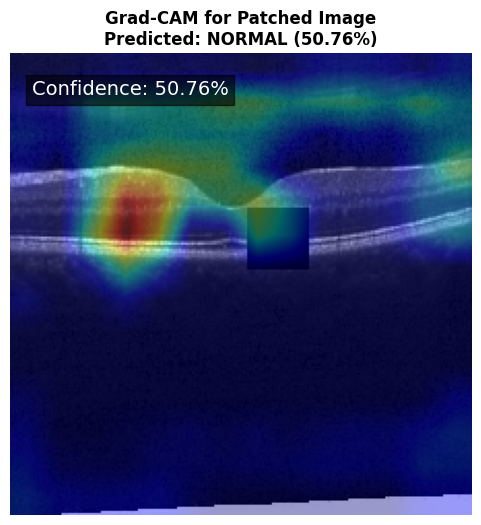

In [58]:
# Predict patched image
patched_preds = model1.predict(patched_img_array)
patched_predicted_class = np.argmax(patched_preds[0])
patched_predicted_label = class_labels[patched_predicted_class]
patched_confidence = np.max(patched_preds[0]) * 100

# Compute Grad-CAM for patched image
patched_heatmap = compute_gradcam(model1, patched_img_array, target_class_idx=patched_predicted_class, last_conv_layer_name="conv2d_8")

# Display Grad-CAM
plt.figure(figsize=(6, 6))
plt.imshow(patched_img)
plt.imshow(patched_heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Patched Image\nPredicted: {patched_predicted_label} ({patched_confidence:.2f}%)", fontsize=12, fontweight='bold', color='black')
plt.axis("off")

# Show confidence score inside the image
plt.text(10, 20, f"Confidence: {patched_confidence:.2f}%", fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.6))

plt.show()

**Patch out of the region**

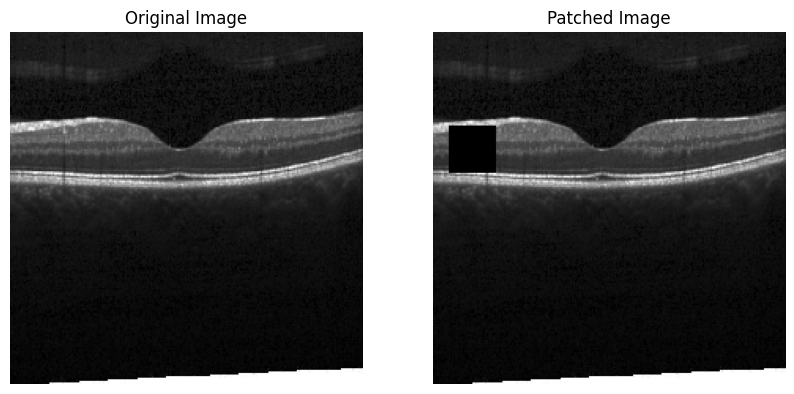

In [61]:
# Convert original image array back to uint8 for visualization
original_image = (img_array[0] * 255).astype(np.uint8)

# Make a copy of the original image to modify
patched_img = original_image.copy()

# Define patch properties
patch_size = 30  # Adjust as needed
x, y = 10, 60  # Change patch location
patch = np.zeros((patch_size, patch_size, 3), dtype=np.uint8)  # Black patch

# Apply the patch
patched_img[y:y+patch_size, x:x+patch_size] = patch

# Preprocess patched image for model (normalize)
patched_img_array = patched_img / 255.0
patched_img_array = np.expand_dims(patched_img_array, axis=0)

# Display original and patched images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Patched Image
plt.subplot(1, 2, 2)
plt.imshow(patched_img)
plt.title("Patched Image")
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


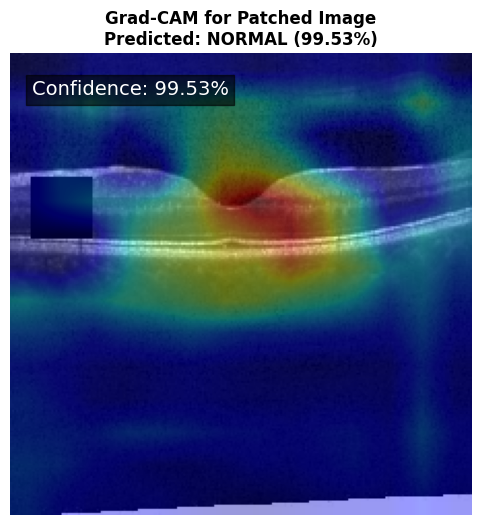

In [62]:
# Predict patched image
patched_preds = model1.predict(patched_img_array)
patched_predicted_class = np.argmax(patched_preds[0])
patched_predicted_label = class_labels[patched_predicted_class]
patched_confidence = np.max(patched_preds[0]) * 100

# Compute Grad-CAM for patched image
patched_heatmap = compute_gradcam(model1, patched_img_array, target_class_idx=patched_predicted_class, last_conv_layer_name="conv2d_8")

# Display Grad-CAM
plt.figure(figsize=(6, 6))
plt.imshow(patched_img)
plt.imshow(patched_heatmap, cmap='jet', alpha=0.4)
plt.title(f"Grad-CAM for Patched Image\nPredicted: {patched_predicted_label} ({patched_confidence:.2f}%)", fontsize=12, fontweight='bold', color='black')
plt.axis("off")

# Show confidence score inside the image
plt.text(10, 20, f"Confidence: {patched_confidence:.2f}%", fontsize=14, color='white', bbox=dict(facecolor='black', alpha=0.6))

plt.show()